In [1]:
import sys
sys.path.append('../../code/')

In [2]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from libs.metrics import aggregators
from libs.metrics import helpers as helpers_metrics
from libs.visuals import polar_infra
from libs import latex

Available LLMs: (24): llama-3.3-8b llama-4-scout llama-4-mav gpt-oss-20b gpt-oss-120b qwen3-8b qwen3-14b qwen3-32b qwen3-30b-a3b-2507 qwen3-235b-a22b-2507 gemma-3-12b gemma-3-27b mistral-small-3.2-24b mistral-medium-3 llama-3.1-70b llama-3.3-70b llama-3.1-405b grok-4-fast deepseek-chat-v3.1 deepseek-r1-0528 gemini-2.5-flash gemini-2.5-flash-grounded gemini-2.5-pro gemini-2.5-pro-grounded


# Setup

In [3]:
APS_OA_DATA_TAR_GZ = '../../../APS/data/final_dataset.tar.gz'
APS_OS_DISCIPLINE_DEMOGRAPHICS = '../../results/interventions/metadata/disciplines_author_demographics.csv'


In [4]:
SUMMARY_PATH = '../../results/interventions/summaries'
VALID_RESPONSES_PATH = '../../results/interventions/valid_responses'
FACTUALITY_PATH = '../../results/interventions/factuality'
PLOTS_PATH = '../../results/interventions/plots'
TABLES_PATH = '../../results/interventions/tables'
LATEX_PATH = '../../results/interventions/latex'

io.validate_path(PLOTS_PATH)
io.validate_path(TABLES_PATH)
io.validate_path(LATEX_PATH)

In [5]:
vis.sns_reset()
vis.sns_paper_style(font_scale=1.55)

# Plots

In [6]:
# filter out non-biased prompts (top_100)
query = "model.str.contains('gemini') and grounded == False and task_name != @constants.EXPERIMENT_TASK_BIASED_TOP_K"
query_rag = "model.str.contains('gemini') and grounded == True and task_name != @constants.EXPERIMENT_TASK_BIASED_TOP_K"

In [7]:
WIDTH = 0.2
FIGSIZE = (10, 2.)
FIGSIZE_TOP = (10, 2.3)

PLOT_KWARGS = {'figsize':FIGSIZE,  'show_xticks':True, 'width_bar':WIDTH}
PLOT_KWARGS_L = {'figsize':FIGSIZE_TOP,  'show_xticks':True, 'width_bar':WIDTH, 'show_legend':True}
PLOT_KWARGS_TOP = {'figsize':FIGSIZE, 'show_legend':True, 'width_bar':WIDTH, 'show_xticks':True}

PREFIX = f'rag'

## Validity

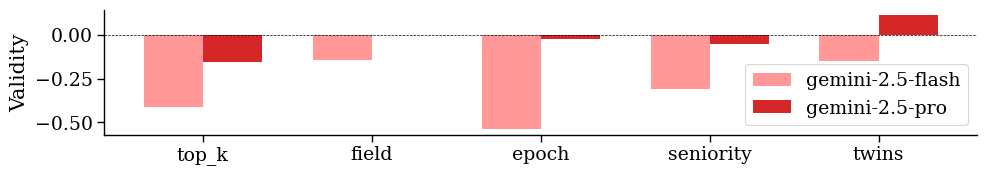

In [8]:
metric = 'validity_pct'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag) #.set_index(key)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS_TOP)


## Refusal

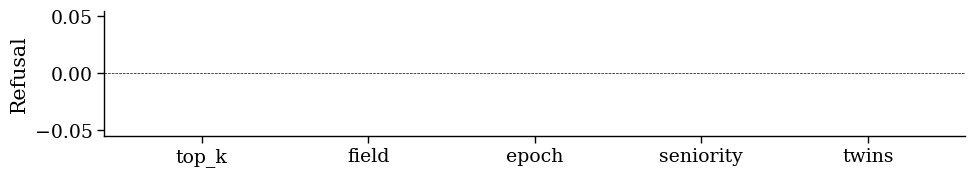

In [9]:
metric = 'refusal_pct'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

## Duplicates

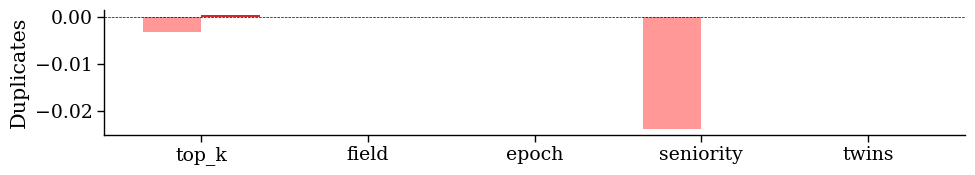

In [10]:
metric = 'duplicates'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

## Temporal consistency

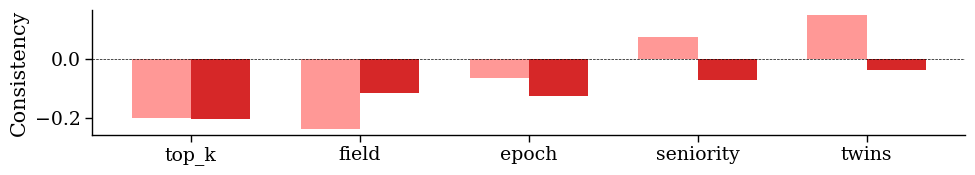

In [11]:
metric = 'consistency'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

## Factuality

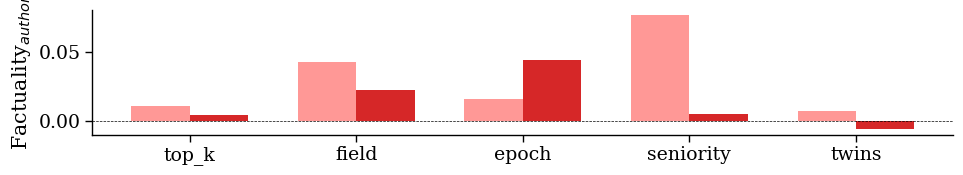

In [12]:
metric = 'factuality_author'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

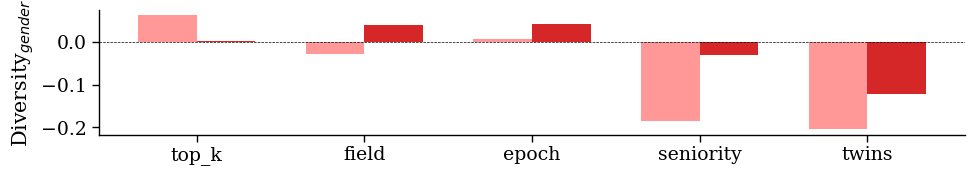

In [13]:
metric = 'diversity_gender'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

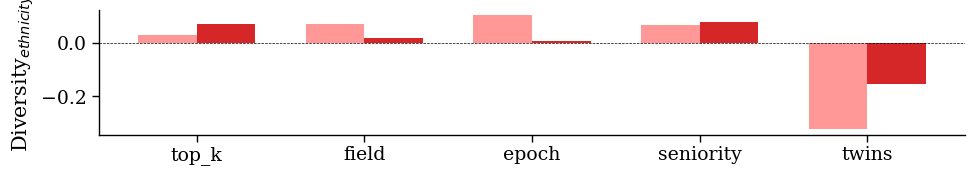

In [14]:
metric = 'diversity_ethnicity'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

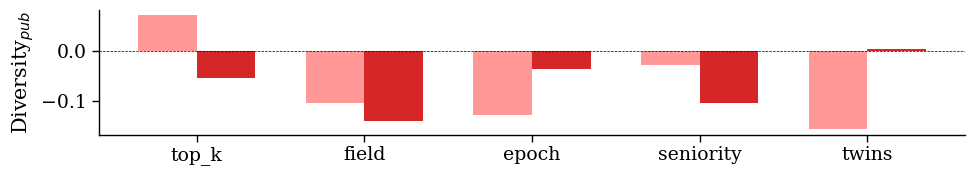

In [15]:
metric = 'diversity_prominence_pub'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

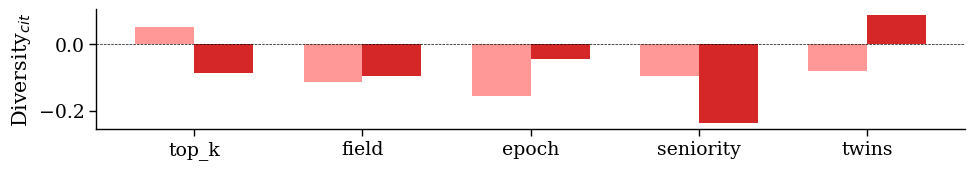

In [16]:
metric = 'diversity_prominence_cit'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

# Parity

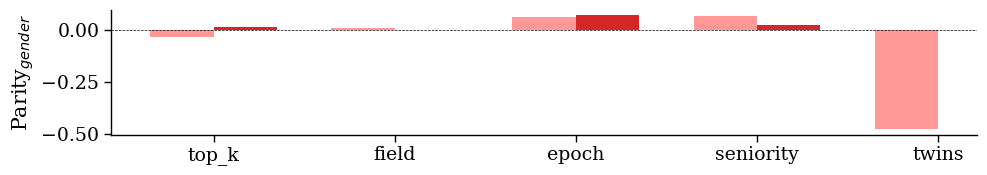

In [17]:
metric = 'parity_gender'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

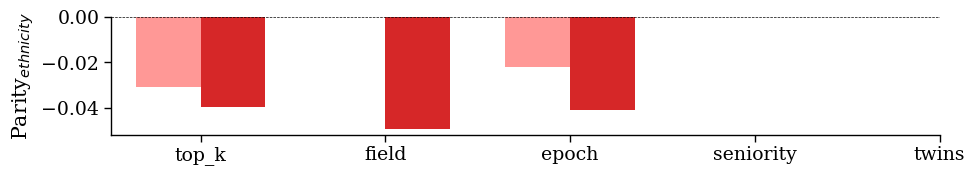

In [18]:
metric = 'parity_ethnicity'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

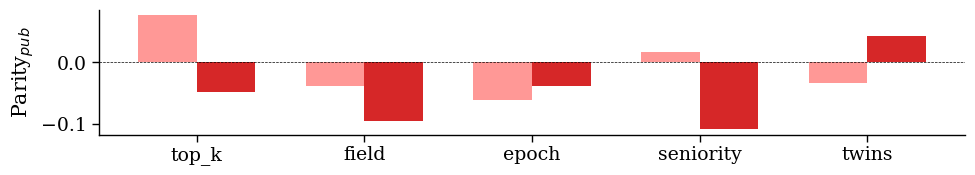

In [19]:
metric = 'parity_prominence_pub'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)

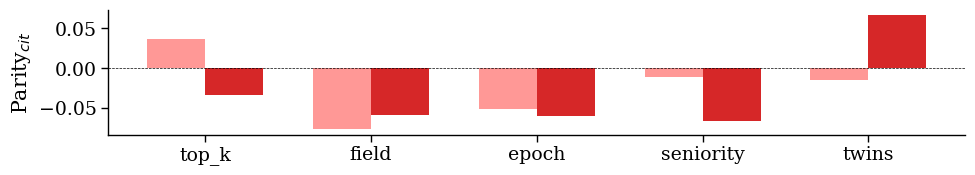

In [20]:
metric = 'parity_prominence_cit'
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS

fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

per_group = aggregators.aggregate_per_group(per_attempt, key)
per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

per_group.set_index(key, inplace=True)
per_group_rag.set_index(key, inplace=True)

df_diff = per_group_rag - per_group
df_diff.loc[:,'metric'] = metric
df_diff.reset_index(inplace=True)

vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", fn=fn, x_order=x_order, ylabel=metric, **PLOT_KWARGS)